In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes= True)

In [2]:
df = pd.read_csv('/Users/parshvisrivastava/Desktop/Binary Classification example/bank-data/train.csv')

In [3]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1
11504797,11504797,Male,25,1,28.0,1,< 1 Year,No,32855.0,152.0,189,0


In [5]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
df.shape

(11504798, 12)

In [7]:
df[df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


No duplicated row

In [8]:
df.count()

id                      11504798
Gender                  11504798
Age                     11504798
Driving_License         11504798
Region_Code             11504798
Previously_Insured      11504798
Vehicle_Age             11504798
Vehicle_Damage          11504798
Annual_Premium          11504798
Policy_Sales_Channel    11504798
Vintage                 11504798
Response                11504798
dtype: int64

In [9]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Detecting outliers

<Axes: xlabel='Age'>

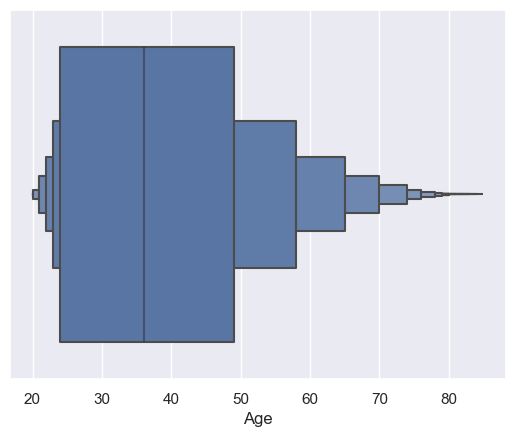

In [10]:
sns.boxenplot(x=df["Age"])

In [11]:
filtered_df = df[df['Age'] < 80]

<Axes: xlabel='Age'>

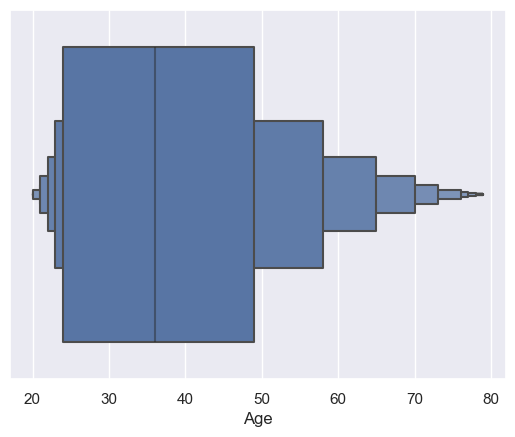

In [12]:
sns.boxenplot(x=filtered_df["Age"])

<Axes: xlabel='Region_Code'>

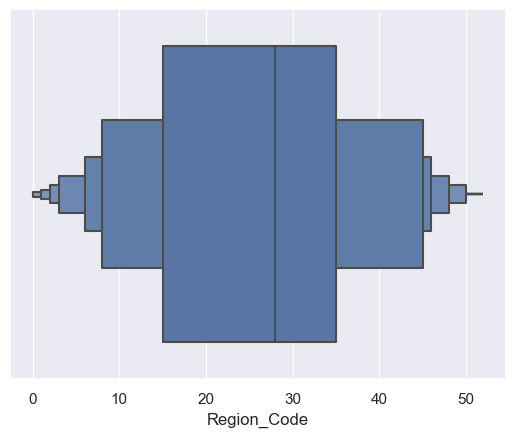

In [13]:
sns.boxenplot(x=df['Region_Code'])

<Axes: xlabel='Annual_Premium'>

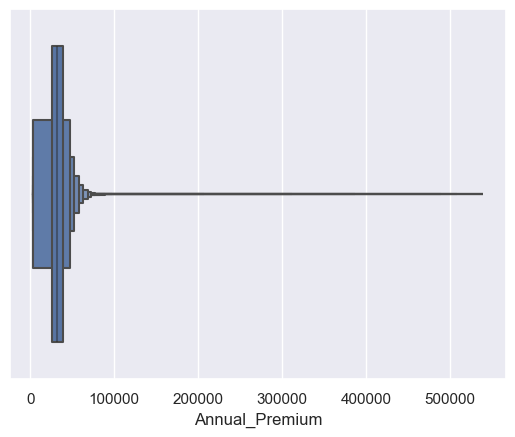

In [14]:
sns.boxenplot(x= df["Annual_Premium"])

In [15]:
filtered_df = df[(df['Annual_Premium'] < 60000)]

<Axes: xlabel='Annual_Premium'>

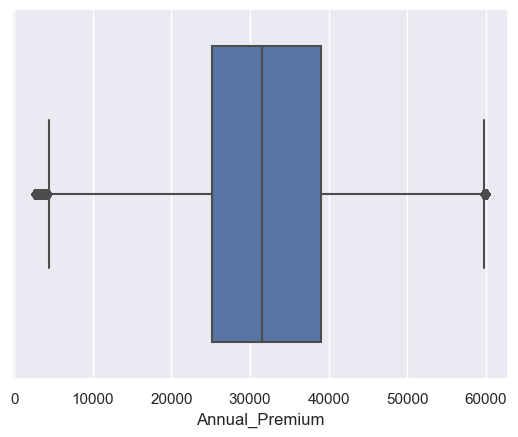

In [16]:
sns.boxplot(x= filtered_df["Annual_Premium"])

<Axes: xlabel='Policy_Sales_Channel'>

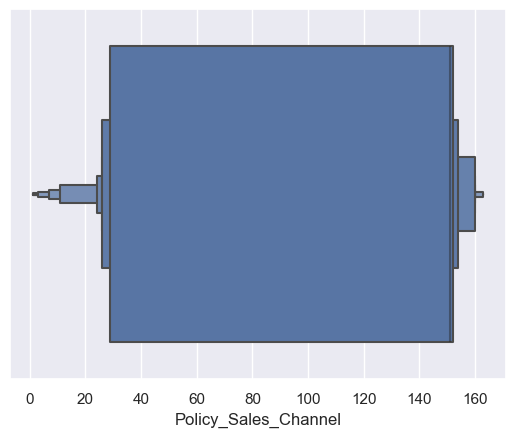

In [17]:
sns.boxenplot(x=df["Policy_Sales_Channel"])

<Axes: xlabel='Vintage'>

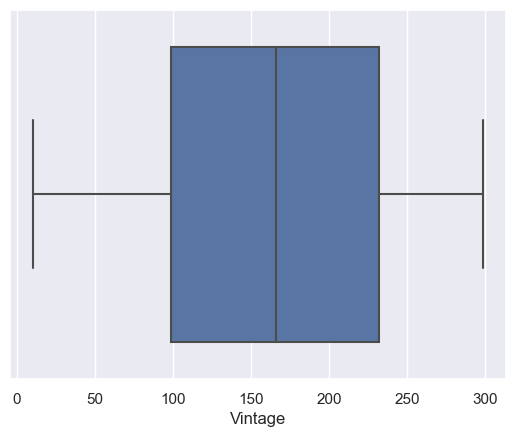

In [18]:
sns.boxplot(x=df["Vintage"])

Text(0, 0.5, 'Number of policy sold')

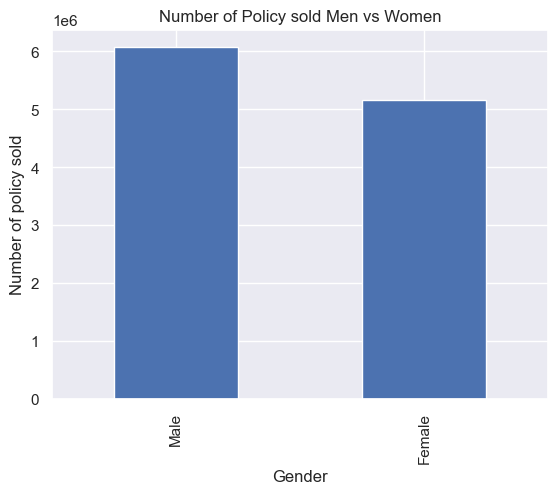

In [19]:
filtered_df.Gender.value_counts().plot(kind ="bar")
plt.title("Number of Policy sold Men vs Women")
plt.xlabel("Gender")
plt.ylabel("Number of policy sold")

Text(0, 0.5, 'Number of policy sold')

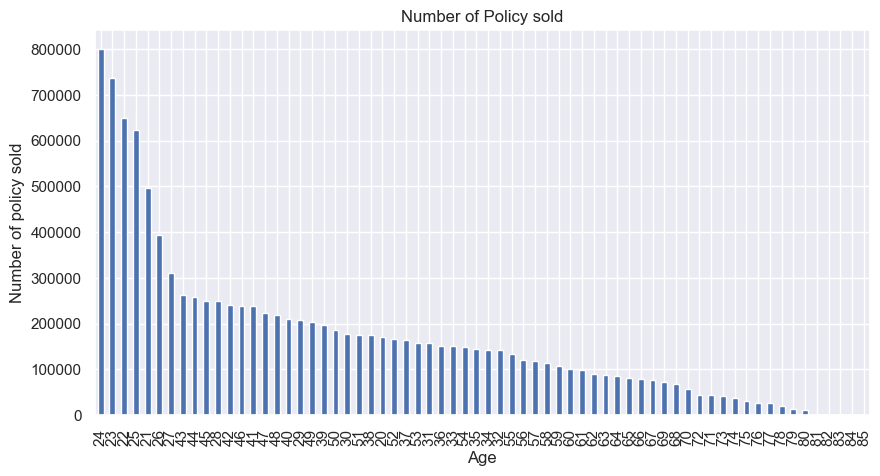

In [20]:
filtered_df.Age.value_counts().plot(kind ="bar", figsize=(10,5))
plt.title("Number of Policy sold")
plt.xlabel("Age")
plt.ylabel("Number of policy sold")

Text(0, 0.5, 'Number of policy sold')

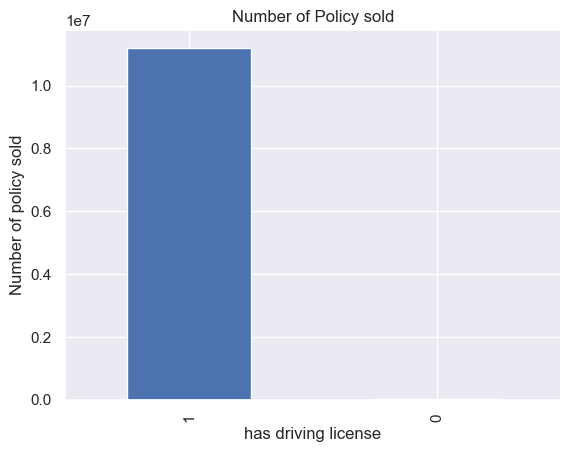

In [21]:
filtered_df.Driving_License.value_counts().plot(kind ="bar")
plt.title("Number of Policy sold")
plt.xlabel("has driving license")
plt.ylabel("Number of policy sold")

Text(0, 0.5, 'Number of policy sold')

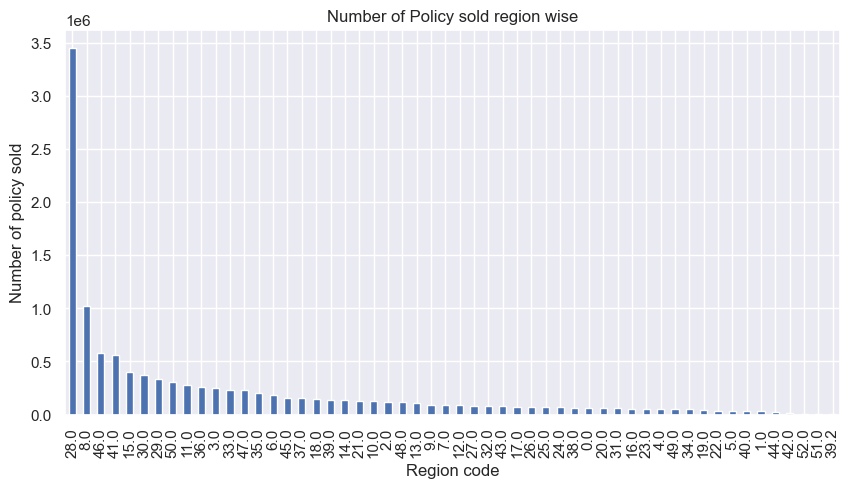

In [22]:
df.Region_Code.value_counts().plot(kind ="bar", figsize=(10,5))
plt.title("Number of Policy sold region wise")
plt.xlabel("Region code")
plt.ylabel("Number of policy sold")

Text(0, 0.5, 'Number of policy sold')

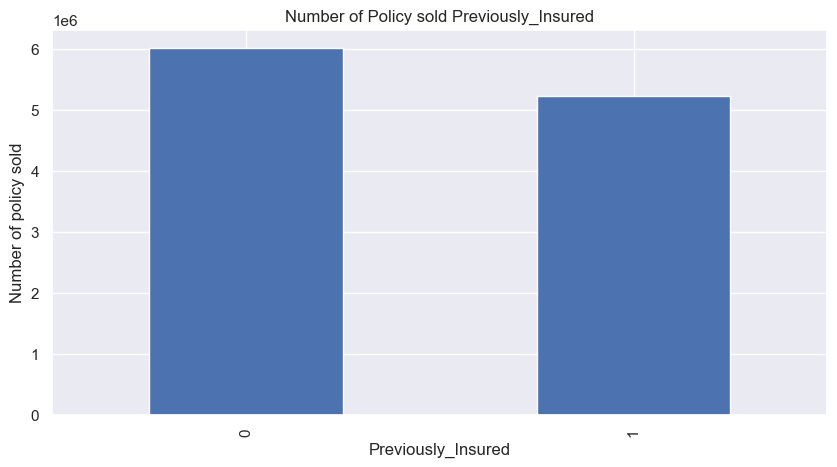

In [23]:
filtered_df.Previously_Insured.value_counts().plot(kind ="bar", figsize=(10,5))
plt.title("Number of Policy sold Previously_Insured")
plt.xlabel("Previously_Insured")
plt.ylabel("Number of policy sold")

Text(0, 0.5, 'Number of policy sold')

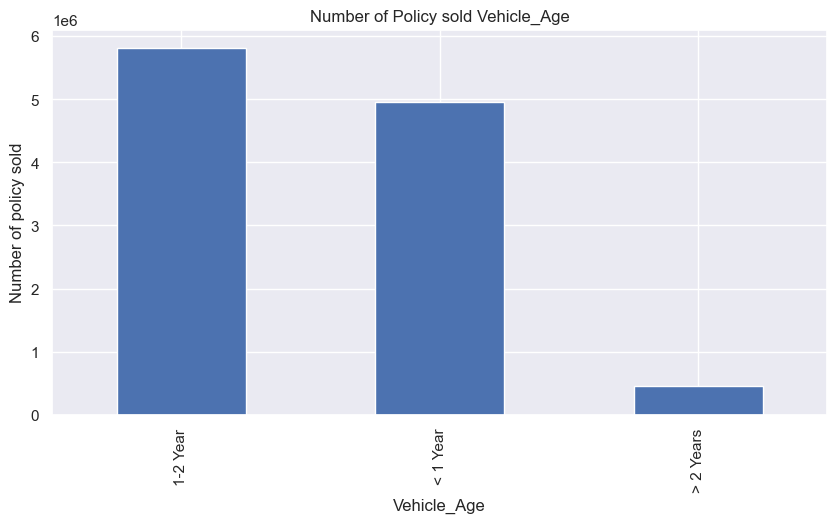

In [24]:
filtered_df.Vehicle_Age.value_counts().plot(kind ="bar", figsize=(10,5))
plt.title("Number of Policy sold Vehicle_Age")
plt.xlabel("Vehicle_Age")
plt.ylabel("Number of policy sold")

Text(0, 0.5, 'Number of policy sold')

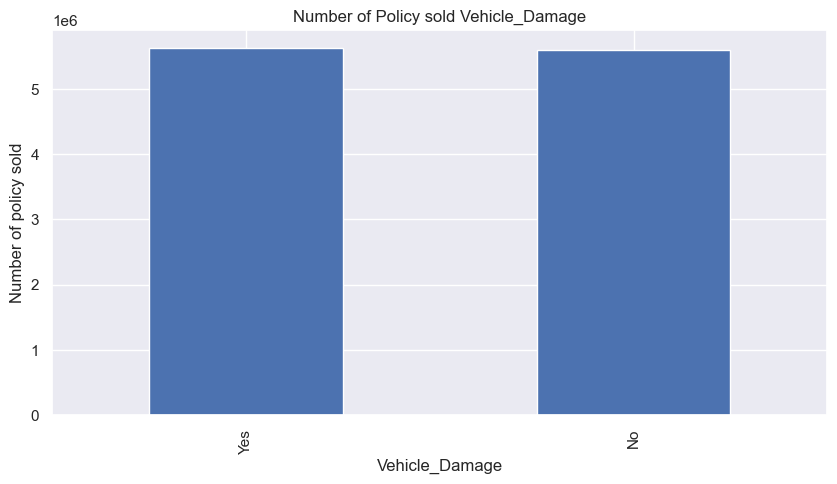

In [25]:
filtered_df.Vehicle_Damage.value_counts().plot(kind ="bar", figsize=(10,5))
plt.title("Number of Policy sold Vehicle_Damage")
plt.xlabel("Vehicle_Damage")
plt.ylabel("Number of policy sold")

Text(0, 0.5, 'Number of policy sold')

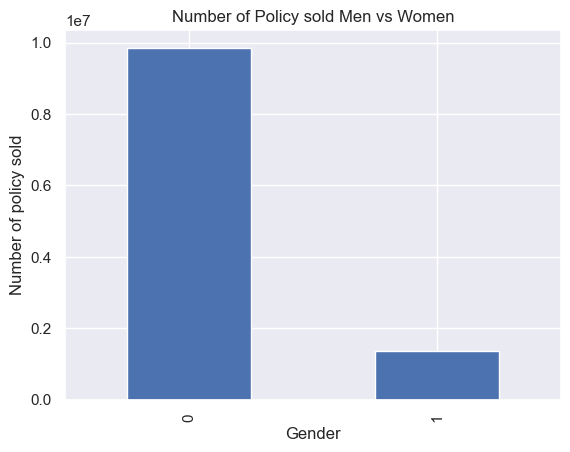

In [26]:
filtered_df.Response.value_counts().plot(kind ="bar")
plt.title("Number of Policy sold Men vs Women")
plt.xlabel("Gender")
plt.ylabel("Number of policy sold")

Encoding the categorical data

In [27]:
filtered_df.set_index('id', inplace=True)

In [28]:
filtered_df=pd.get_dummies(filtered_df, columns=["Gender","Vehicle_Age","Vehicle_Damage"],dtype=int)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
Age,1.000000,-0.078151,0.036329,-0.275575,0.036985,-0.590413,-0.013215,0.122529,-0.159494,0.159494,0.712210,-0.803146,0.218836,-0.287170,0.287170
Driving_License,-0.078151,1.000000,-0.001366,0.013717,-0.005126,0.042914,-0.000719,0.008924,0.018609,-0.018609,-0.036092,0.038966,-0.006703,0.015532,-0.015532
Region_Code,0.036329,-0.001366,1.000000,-0.021132,0.005867,-0.037468,-0.005494,0.011799,-0.000080,0.000080,0.032048,-0.037873,0.014230,-0.025257,0.025257
Previously_Insured,-0.275575,0.013717,-0.021132,1.000000,0.016924,0.234219,0.019524,-0.345751,0.088616,-0.088616,-0.298865,0.375655,-0.189514,0.835205,-0.835205
Annual_Premium,0.036985,-0.005126,0.005867,0.016924,1.000000,-0.117994,0.003030,0.029440,-0.008893,0.008893,-0.024626,0.007276,0.044258,-0.004159,0.004159
Policy_Sales_Channel,-0.590413,0.042914,-0.037468,0.234219,-0.117994,1.000000,0.008972,-0.150799,0.117291,-0.117291,-0.516400,0.577369,-0.146113,0.238060,-0.238060
Vintage,-0.013215,-0.000719,-0.005494,0.019524,0.003030,0.008972,1.000000,-0.015321,0.009680,-0.009680,-0.017442,0.019040,-0.003767,0.019520,-0.019520
Response,0.122529,0.008924,0.011799,-0.345751,0.029440,-0.150799,-0.015321,1.000000,-0.055655,0.055655,0.176086,-0.219883,0.108001,-0.359637,0.359637
Gender_Female,-0.159494,0.018609,-0.000080,0.088616,-0.008893,0.117291,0.009680,-0.055655,1.000000,-1.000000,-0.156044,0.175011,-0.045528,0.098032,-0.098032
Gender_Male,0.159494,-0.018609,0.000080,-0.088616,0.008893,-0.117291,-0.009680,0.055655,-1.000000,1.000000,0.156044,-0.175011,0.045528,-0.098032,0.098032


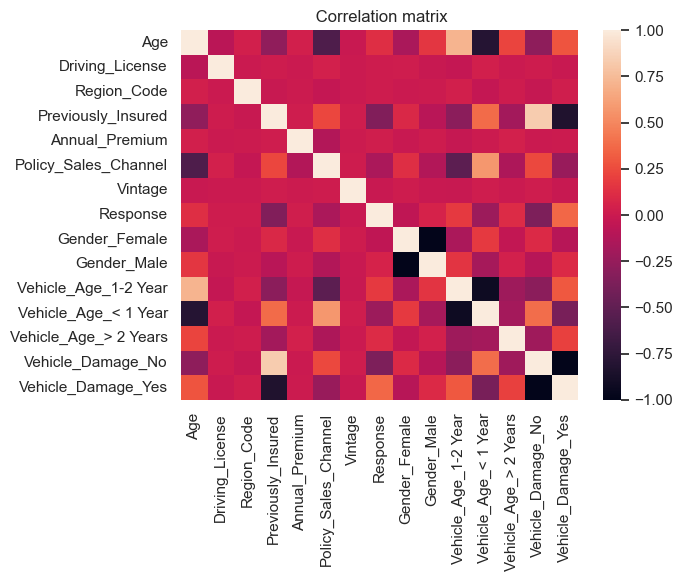

In [29]:
corr = filtered_df.corr()
plt.title(" Correlation matrix")
sns.heatmap(corr)
corr

Text(0, 0.5, 'Response')

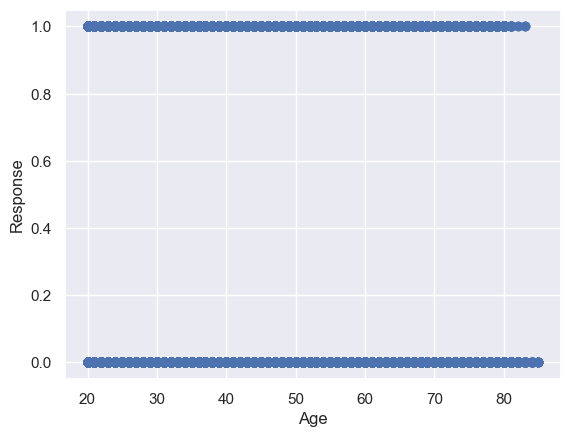

In [32]:
ax = plt.subplot()
ax.scatter(filtered_df['Age'], filtered_df['Response'])
ax.set_xlabel("Age")
ax.set_ylabel("Response")

Text(0, 0.5, 'Response')

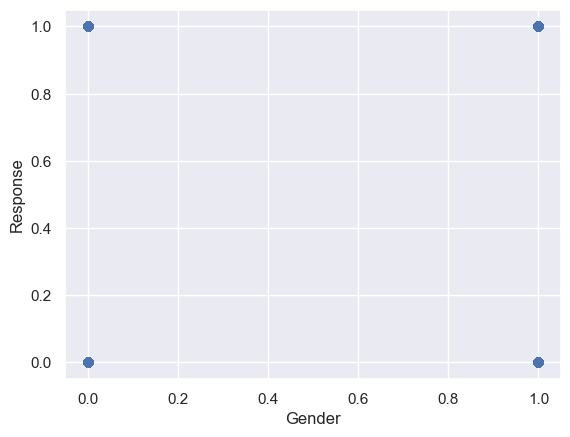

In [34]:
ax = plt.subplot()
ax.scatter(filtered_df['Gender_Female'], filtered_df['Response'])
ax.set_xlabel("Gender")
ax.set_ylabel("Response")